In [41]:
import sys
import cantera as ct
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

import phases
import feedstock as fs
import fuel as fu
import energy as en
import gasifier as gs

In [42]:
ultimate = [52.00, 6.07, 41.55, 0.28, 0, 0]
ashDB = 0.10 / 100
HHV = 20.407 # MJ/kg

In [43]:
moistWB = 0.11
moistDB = moistWB / (1 - moistWB)
fuelDryMass = 11.7
fuel = fs.create_fuel_stream(fuelDryMass, ultimate, ashDB, moistDB, HHV)
fuelMass = fuel.get_mass()
print(fuelMass)

13.146067415730336


In [44]:
AFR = 1.829
airMass = AFR * fuelMass
air = fs.create_air_stream(airMass)
outlet = gs.gasify_isot(fuel, air, T=832+273.15, P=0.93*1E5, charFormation=0.0, directMethaneConv=0.0)

species = ['H2', 'CO', 'CO2', 'CH4', 'N2']
pure_model_frac = np.zeros(len(species))
pure_model_props = np.zeros(2)

for i, sp in enumerate(species):   
    pure_model_frac[i] = 100*outlet.get_syngas_fraction(sp, water=False, nitrogen=True)

pure_model_props[0] = outlet.get_syngas_hhv('vol', water=False, nitrogen=True)
pure_model_props[1] = outlet.get_syngas_amount(basis='mass', water=False, nitrogen=True) / fuelDryMass
print(pure_model_props)

[6.07614684 3.01514027]


In [45]:
AFR = 1.829
airMass = AFR * fuelMass
air = fs.create_air_stream(airMass)
outlet = gs.gasify_isot(fuel, air, T=832+273.15, P=0.93*1E5, charFormation=0.15, directMethaneConv=0.0)

species = ['H2', 'CO', 'CO2', 'CH4', 'N2']
char_model_frac = np.zeros(len(species))
char_model_props = np.zeros(2)

for i, sp in enumerate(species):   
    char_model_frac[i] = 100*outlet.get_syngas_fraction(sp, water=False, nitrogen=True)

char_model_props[0] = outlet.get_syngas_hhv('vol', water=False, nitrogen=True)
char_model_props[1] = outlet.get_syngas_amount(basis='mass', water=False, nitrogen=True) / fuelDryMass
print(char_model_props)

[5.21406143 2.86413513]


In [46]:
AFR = 1.829
airMass = AFR * fuelMass
air = fs.create_air_stream(airMass)
outlet = gs.gasify_isot(fuel, air, T=832+273.15, P=0.93*1E5, charFormation=0.15, directMethaneConv=0.05)

species = ['H2', 'CO', 'CO2', 'CH4', 'N2']
both_model_frac = np.zeros(len(species))
both_model_props = np.zeros(2)

for i, sp in enumerate(species):
    both_model_frac[i] = 100*outlet.get_syngas_fraction(sp, water=False, nitrogen=True)

both_model_props[0] = outlet.get_syngas_hhv('vol', water=False, nitrogen=True)
both_model_props[1] = outlet.get_syngas_amount(basis='mass', water=False, nitrogen=True) / fuelDryMass
print(both_model_props)

[5.23074056 2.85272586]


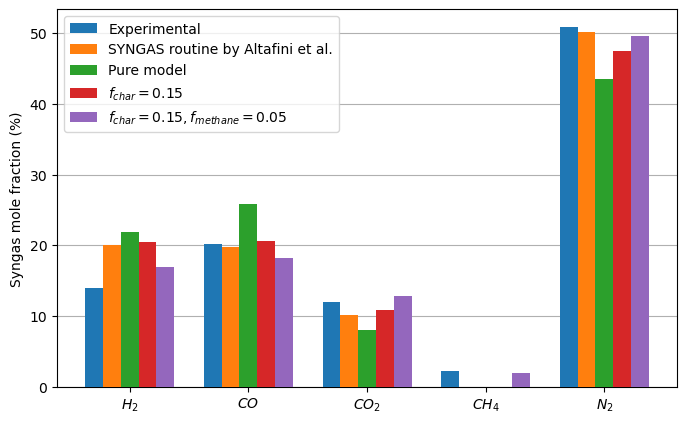

In [47]:
frac_groups = ['$H_2$', '$CO$', '$CO_2$', '$CH_4$', '$N_2$']
exp_frac = [14.00, 20.14, 12.06, 2.31, 50.79]
author_model_frac = [20.06, 19.70, 10.15, 0, 50.10]

X_axis1 = np.arange(len(frac_groups))

w = 0.15

fig, ax1 = plt.subplots(figsize=(8,5), dpi=100)
ax1.bar(X_axis1 - 2*w, exp_frac, w, label='Experimental', zorder=3)
ax1.bar(X_axis1 - w, author_model_frac, w, label='SYNGAS routine by Altafini et al.', zorder=3)
ax1.bar(X_axis1, pure_model_frac, w, label='Pure model', zorder=3)
ax1.bar(X_axis1 + w, char_model_frac, w, label='$f_{char}=0.15$', zorder=3)
ax1.bar(X_axis1 + 2*w, both_model_frac, w, label='$f_{char}=0.15, f_{methane}=0.05$', zorder=3)
ax1.set_ylabel("Syngas mole fraction (%)")
ax1.grid(zorder=0, axis='y')
plt.xticks(X_axis1, frac_groups)

plt.legend(loc='upper left')
plt.savefig('figures/altafini1.png')
plt.show()

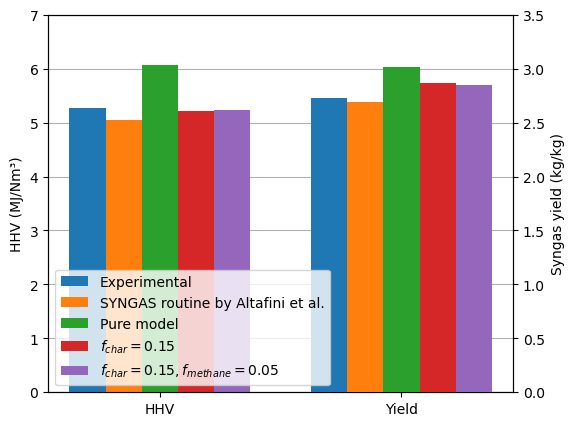

In [58]:
prop_groups = ['HHV', 'Yield']
exp_props = [5.276, 31.89 / 11.7] # MJ/kg, kg syngas / kg fuel
author_model_props = [5.042, 33.96 / 12.60] # MJ/kg, kg syngas / kg fuel
  
X_axis2 = np.arange(1)
X_axis3 = np.arange(X_axis2[-1]+1, X_axis2[-1]+1+1)

fig2, ax2 = plt.subplots(figsize=(6,5), dpi=100)
ax2.bar(X_axis2 - 2*w, exp_props[0], w, label='Experimental', zorder=3)
ax2.bar(X_axis2 - w, author_model_props[0], w, label='SYNGAS routine by Altafini et al.', zorder=3)
ax2.bar(X_axis2, pure_model_props[0], w, label='Pure model', zorder=3)
ax2.bar(X_axis2 + w, char_model_props[0], w, label='$f_{char}=0.15$', zorder=3)
ax2.bar(X_axis2 + 2*w, both_model_props[0], w, label='$f_{char}=0.15, f_{methane}=0.05$', zorder=3)
ax2.set_ylabel("HHV (MJ/Nm³)")
ax2.set_ylim(0,7)

ax3 = ax2.twinx()
ax3.bar(X_axis3 - 2*w, exp_props[1], w, label='Experimental', zorder=3)
ax3.bar(X_axis3 - w, author_model_props[1], w, label='SYNGAS routine by Altafini et al.', zorder=3)
ax3.bar(X_axis3, pure_model_props[1], w, label='Pure model', zorder=3)
ax3.bar(X_axis3 + w, char_model_props[1], w, label='$f_{char}=0.15$', zorder=3)
ax3.bar(X_axis3 + 2*w, both_model_props[1], w, label='$f_{char}=0.15, f_{methane}=0.05$', zorder=3)
ax3.set_ylabel("Syngas yield (kg/kg)")
ax3.set_ylim(0,3.5)

plt.xticks(np.concatenate((X_axis2, X_axis3)), prop_groups)

ax2.grid(zorder=0, axis='y')
plt.legend(loc='lower left')
plt.savefig('figures/altafini2.png')
plt.show()